<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_AB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [3]:
!pip install ftfy

     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=8d6158f1cfa91d5e57033195eb3d3684d9f0848509097f0fd047404340cb1b8a
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [6]:
#importing libraries
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
dataset = pd.read_excel('sample_data/input_data.xlsx', )
dataset.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [12]:
dataset.shape

(8500, 4)

In [13]:
# Describe the dataset with various summary and statistics
dataset.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [14]:
# Check the Short description of tickets having Description as only 'the'
dataset[dataset.Description == 'the']

,Short description,Description,Caller,Assignment group
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17
1476,reset passwords for bnoupaki cpeioxdz using pa...,the,bnoupaki cpeioxdz,GRP_17
1558,reset passwords for usa feathers using passwor...,the,lmqysdec ljvbnpqw,GRP_17
1693,reset passwords for eglavnhx uprodleq using pa...,the,eglavnhx uprodleq,GRP_17
1834,reset passwords for hybiaxlk lawptzir using pa...,the,hybiaxlk lawptzir,GRP_17
1850,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


In [15]:
# Find out the null value counts in each column
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [16]:
# Let's look at the rows with null values
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [17]:
# NULL replacement
dataset.fillna(str(), inplace=True)
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [18]:
# verify the replacement
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [22]:
duplicate = dataset[dataset.duplicated()]

In [23]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [24]:
duplicate

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
724,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1064,job Job_1967d failed in job_scheduler at: 10/1...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
1125,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1744,phone issue,phone issue,gzjtweph mnslwfqv,GRP_0
1851,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


In [25]:
dataset1 = dataset[~dataset.duplicated()]

In [26]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [28]:
# Merge the Short descrition and Description column texts to create a new column
dataset1.insert(loc=4, 
              column='combined_description_caller', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip() + ' ' + dataset1['Caller'].str.strip()))

In [29]:
dataset1.insert(loc=5, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip()))

In [30]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,cant log in to vpn received from: eylqgodm.ybq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error


In [31]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            8417 non-null   object
 1   Description                  8417 non-null   object
 2   Caller                       8417 non-null   object
 3   Assignment group             8417 non-null   object
 4   combined_description_caller  8417 non-null   object
 5   combined_description         8417 non-null   object
dtypes: object(6)
memory usage: 460.3+ KB


In [32]:
dataset1.to_csv("sample_data/dataset1_combined.csv")

In [33]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0,password expiry tomorrow received from: ecprjb...,password expiry tomorrow received from: ecprjb...
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0,server issues received from: bgqpotek.cuxakvml...,server issues received from: bgqpotek.cuxakvml...
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation from: tvcdfqgp nrbcqw...,mobile device activation from: tvcdfqgp nrbcqw...
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0,access to bex received from: yfqoaepn.xnezhsit...,access to bex received from: yfqoaepn.xnezhsit...
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0,æ’¤å›ž: ticket_no1564867 -- comments added rec...,æ’¤å›ž: ticket_no1564867 -- comments added rec...
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18,[urgent!!] delivery note creation request!! re...,[urgent!!] delivery note creation request!! re...
177,unable to access password_management_tool id p...,i try to change now my password acc. to attach...,ijeqpkrz nwtehsyx,GRP_2,unable to access password_management_tool id p...,unable to access password_management_tool id p...
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24,support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...,support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223,probleme mit bluescreen .,"hallo ,\n\nes ist erneut passiert. der pc hat ...",vrfpyjwi nzhvgqiw,GRP_24,"probleme mit bluescreen . hallo ,\n\nes ist er...","probleme mit bluescreen . hallo ,\n\nes ist er..."


In [34]:
# Take an example of row# 8471 combined_description and fix it
print('Garbled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (dataset1['combined_description'][8471], 
                                                                        fix_text(dataset1['combined_description'][8471])))

# List all mojibakes defined in ftfy library
#print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Garbled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥ to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来 to 小贺,早上电脑开机开不出来


In [35]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)
dataset1['combined_description']=dataset1['combined_description'].apply(fix_text)
dataset1['combined_description_caller']=dataset1['combined_description_caller'].apply(fix_text)

In [36]:
# Visualize row#8471
dataset1.loc[8471,:]

Short description                                                 电脑开机开不出来
Description                                               to 小贺,早上电脑开机开不出来
Caller                                                   xqyjztnm onfusvlz
Assignment group                                                    GRP_30
combined_description_caller    电脑开机开不出来 to 小贺,早上电脑开机开不出来 xqyjztnm onfusvlz
combined_description                             电脑开机开不出来 to 小贺,早上电脑开机开不出来
Name: 8471, dtype: object

In [37]:
dataset1.to_csv('sample_data/dataset1_mojibake_treated.csv', index=False, encoding='utf_8_sig')

In [38]:
# Define regex patterns
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement


In [39]:
# Take an example of row# 32 Description and fix it
print('\033[1mOriginal text:\033[0m')
print(dataset1['combined_description'][50])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanseText(dataset1['combined_description'][50]))

Original text:
job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00 received from: monitoring_tool@company.com

job mm_zscr0099_dly_merktc3 failed in job_scheduler at: 10/31/2016 08:36:00
____________________________________________________________________________________________________
Cleaned text:
job mmzscrdlymerktc failed in jobscheduler at received from monitoring_tool@company.com job mmzscrdlymerktc failed in jobscheduler at


In [40]:
# Apply the cleaning function to entire dataset
dataset1['Description'] = dataset1['Description'].apply(cleanseText)
dataset1['Short description'] = dataset1['Short description'].apply(cleanseText)
dataset1['combined_description']=dataset1['combined_description'].apply(cleanseText)
dataset1['combined_description_caller']=dataset1['combined_description'].apply(cleanseText)
# Verify the data
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...
1,outlook,received from hmjdrvpb.komuaywn@gmail.com hell...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com hi i...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error


## Exploratory Data Analysis

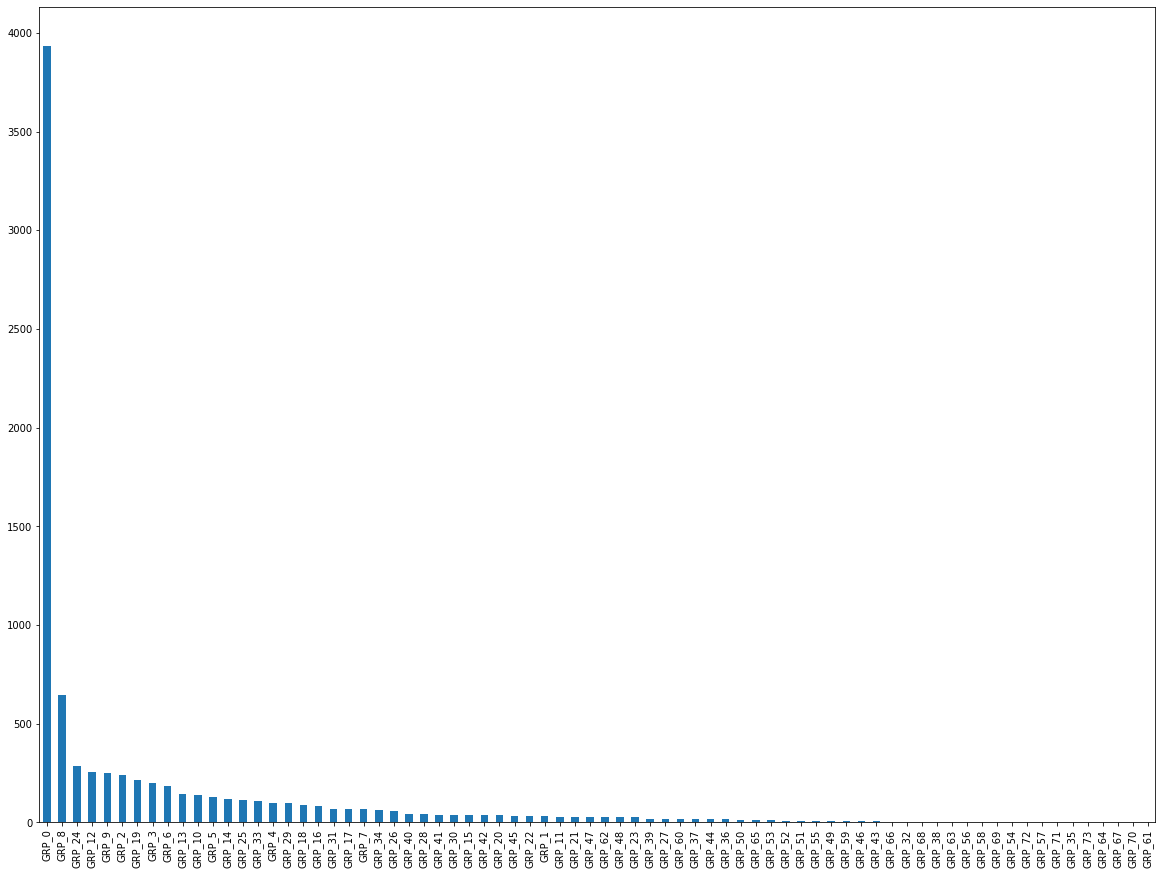

In [47]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

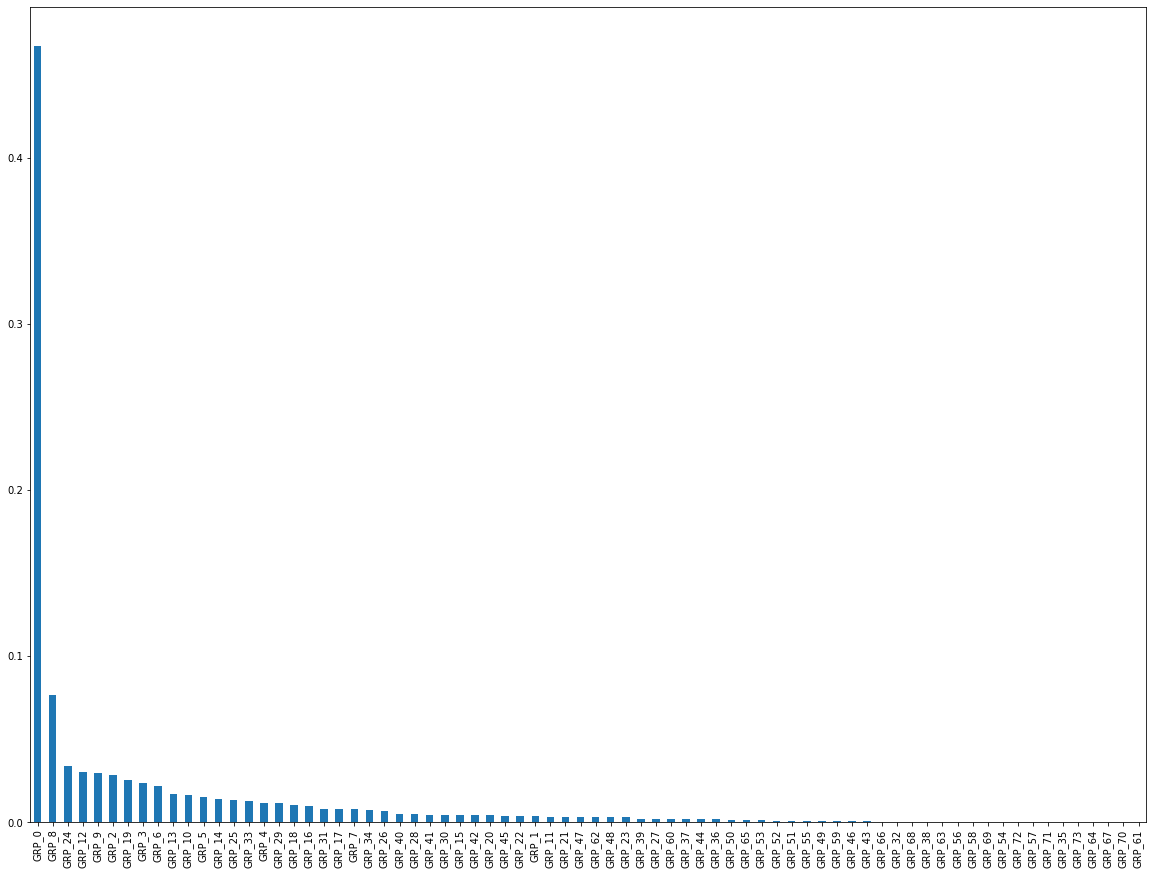

In [48]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [50]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_17    0.008079
GRP_7     0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_22    0.003683
GRP_1     0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_62    0.002970
GRP_48    0.002970
GRP_23    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_60    0.001901
GRP_37    0.001901
GRP_44    0.001782
GRP_36    0.001782
GRP_50    0.001663
GRP_65    0.001307
GRP_53    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [41]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', dataset1['Caller'].nunique())
df = pd.DataFrame(dataset1.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [42]:
# Top 5 callers in each assignment group
top_n = 5
s = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

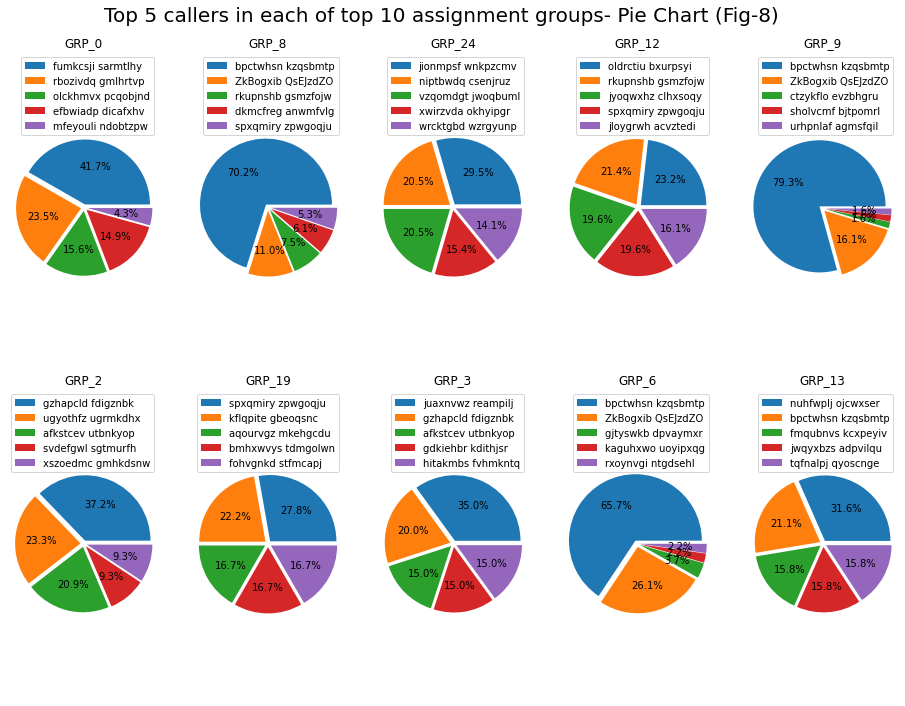

In [43]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
assgn_grp = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = assgn_grp.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

Huge class imbalance , so upsampling

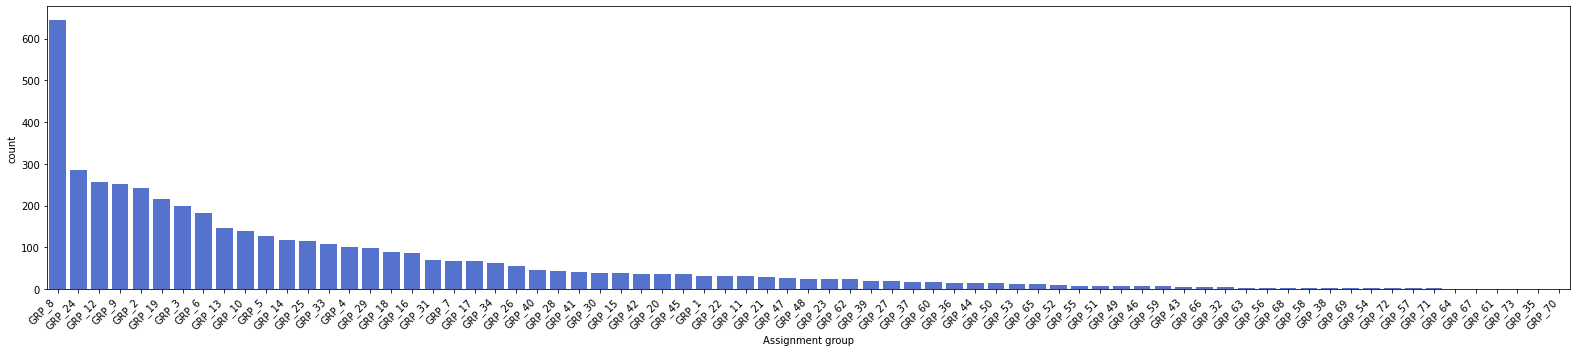

In [44]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
dataset1_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = dataset1_nogrp0['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=dataset1_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [45]:
maxcount = dataset1_nogrp0['Assignment group'].value_counts().max()
maxcount

645

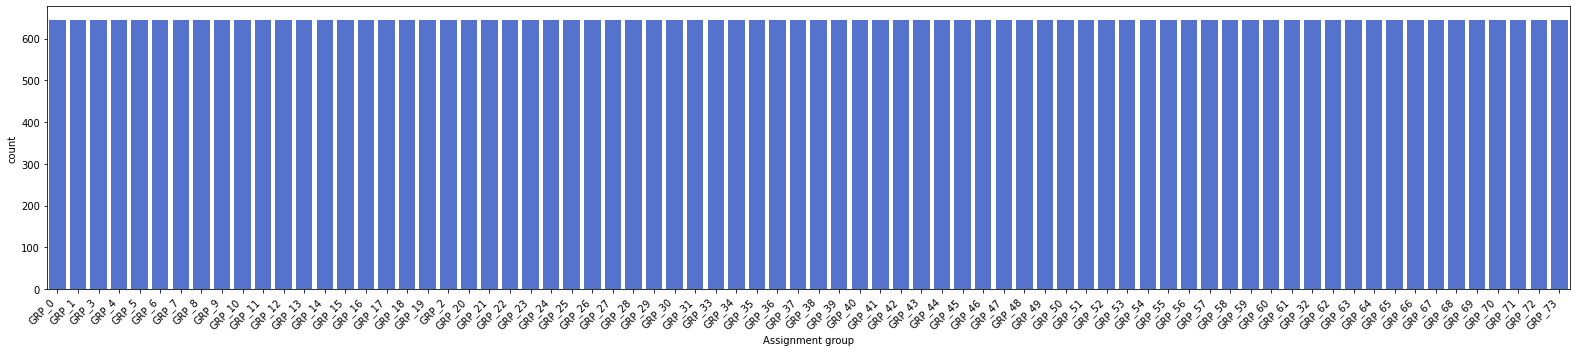

In [46]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 645.This is for us to try creating a single model which use the whiole dataset & verify the performance

dataset1_upsampled = dataset1[0:0]
for grp in dataset1['Assignment group'].unique():
    dataset1_grp = dataset1[dataset1['Assignment group'] == grp]
    resampled = resample(dataset1_grp, replace=True, n_samples=int(maxcount), random_state=123)
    dataset1_upsampled = dataset1_upsampled.append(resampled)

descending_order = dataset1_upsampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=dataset1_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()